# Milestone 2

This notebook contains the submission for milestone 2.

It is structured into two parts:

1. Data handling: we discuss how we handle our data  
2. Initial data analysis: we perform an initial data analysis and evaluate the feasability of our project idea

# 1. Data Handling

The initial data we use is contained in the [data](data/) folder. We use the [CMU movie dataset](http://www.cs.cmu.edu/~ark/personas/) as well as the [IMDb datasets](https://www.imdb.com/interfaces/).

Please refer to the [docs](docs/instr.md#get-initial-datasets) if you want to reproduce our results.

The [readme](README.md#additional-datasets-used) explains our logic behind using the IMDb dataset, as required in the project guidelines.

## Initial data 

The initial data is contained in the [data](data/) folder.

The functions in [data_initial](src/utils/data_initial.py) are used to load this data. They handle the preliminary preprocessing and data cleaning.

## Processed data

The processed data is contained in the [generated](generated/) folder.

[generate_data](src/generate_data.ipynb) is used to process the initial data and generate what we will use for the project. Please refer to it for the detailed logic on how we, for example, combined our two datasets.

The functions in [data_generated](src/utils/data_generated.py) are used to load this data. When working on the project, the data will be loaded exclusively using those. Nothing will be loaded "explicitly", e.g. by using a `pandas.read_csv` call. 

# 2. Initial Data Analysis

We performed different edas in order to decide on which project idea to pursue, while checking the feasability of them. We quickly present them and conclude with the main take aways on the overall structure and content of our data.

For a more detailed look into our analysis, please take a look at each notebook.

## Movie genres

In [eda_genres](src/eda/eda_genres.ipynb) we looked into the feasability of analysing movie genre trends and their evolution through time as a project. Whilst it indeed seemed feasible, we decide to work on the relationship project instead.

## Ethnicity data

In [eda_ethnicity](src/eda/eda_ethnicity.ipynb) we looked into the ethnicity data specifically, because we wanted to see how usable it is.

## Relationship graphs

In [eda_graphs](src/eda/eda_graphs.ipynb) we looked into the feasability of building a network graph for analysing the connections/relationships between people in the movie industry.

## Overall Data Structure

When doing our eda, we saw that the quality of our data is not constant over its timespan.

In [1]:
from src.utils.data_generated import *
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('src/')

In [3]:
# load movie data
# use legacy version to have entire timespan
movie_data = load_movie_metadata(legacy=True)

In [4]:
dates = movie_data.release_date.apply(lambda d: d.year).dropna().sort_values(ascending=True)
print("The dataset contains movies released from {:d} to {:d}.".format(list(dates)[0], list(dates)[-1]))

The dataset contains movies released from 1894 to 2016.


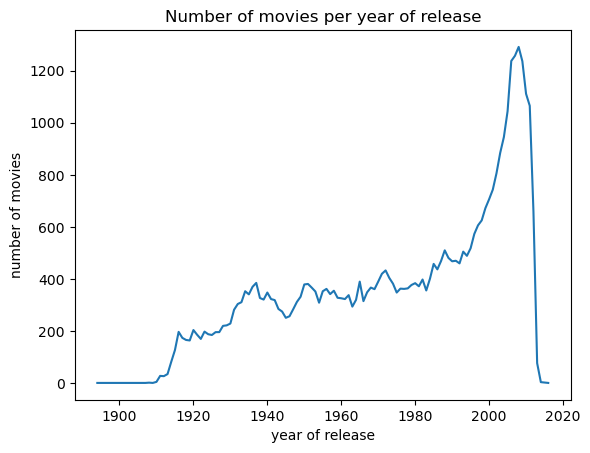

In [5]:
dates.value_counts().sort_index().plot()
plt.title('Number of movies per year of release')
plt.xlabel('year of release')
plt.ylabel('number of movies')
plt.show()

In [6]:
n_movies_per_year = movie_data.copy()
n_movies_per_year.release_date = n_movies_per_year.release_date.apply(lambda d: d.year)
n_movies_per_year = n_movies_per_year.groupby('release_date').movie_id_freebase.agg('count')

In [7]:
n_movies_per_year.sort_values(ascending=False).head(20)

release_date
2008    1291
2007    1257
2006    1237
2009    1236
2010    1111
2011    1065
2005    1044
2004     945
2003     884
2002     806
2001     743
2000     706
1999     672
2012     659
1998     625
1997     606
1996     573
1995     518
1988     510
1993     505
Name: movie_id_freebase, dtype: int64

We can see that the number of movies per year is stagnant from 1920 to 1960 and grows rapidly from 1996 on.

In [8]:
n_movies_per_year.sort_index(ascending=False).head(7)

release_date
2016       1
2014       4
2013      77
2012     659
2011    1065
2010    1111
2009    1236
Name: movie_id_freebase, dtype: int64

We can also see that we seem to be missing many movies from 2012 on, because the number of releases certainly did not slow down. This is due to the declining popularity, and finally discontinuation, of Freebase, where the data of the cmu dataset is from.

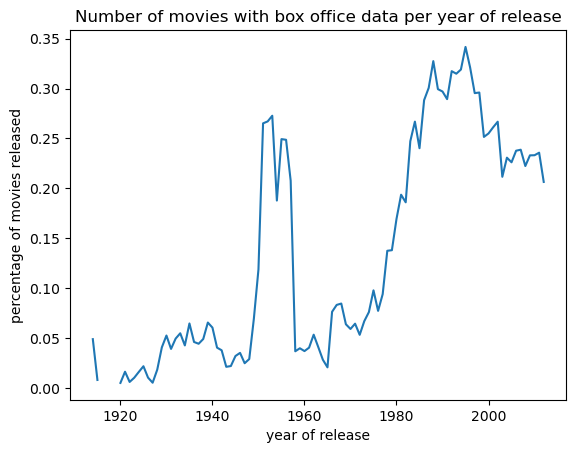

In [9]:
# look into movies with box office revenue data
movie_data.dropna(subset=['box_office_revenue']).release_date.apply(lambda d: d.year).value_counts().divide(n_movies_per_year).sort_index().plot()
plt.title('Number of movies with box office data per year of release')
plt.xlabel('year of release')
plt.ylabel('percentage of movies released')
plt.show()

From the graph above, we can see that we have some box office data from 1951 to 1957 as well as from 1980 onward.

We decided to focus on the timespan from 1996 to 2011 for the following reasons:

- as we have just shown, there are many more movies in our data per year in this timespan
- as we have just shown, we have more box office data for this timespan than for others. This could come in handy for our project
- the trials for network generation showed that it is indeed possible. We tried it for the timespan 2000 to 2009 and it already took 5 hours to generate. To make handling the network easier, 16 years seems a reasonable compromise.

Let us now look at the basic descriptive statistics of the data we will use in our project.

In [10]:
movie_data = load_movie_metadata()

In [11]:
# look into how many movies per year we have in our dataset
dates = movie_data.release_date.apply(lambda d: d.year).dropna().sort_values(ascending=True)

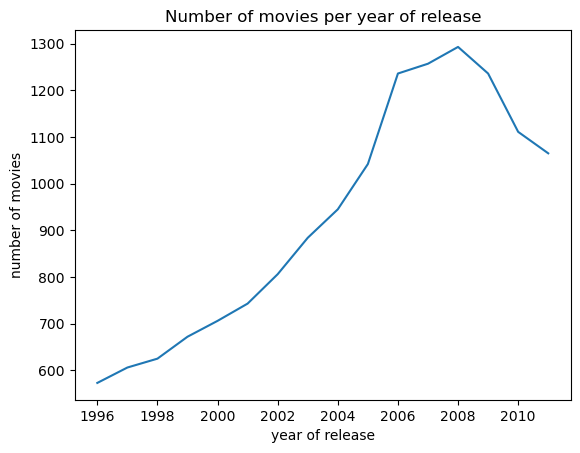

In [12]:
dates.value_counts().sort_index().plot()
plt.title('Number of movies per year of release')
plt.xlabel('year of release')
plt.ylabel('number of movies')
plt.show()

In [13]:
print("We have {:d} movies in our dataset.".format(len(movie_data)))

We have 14800 movies in our dataset.


In [14]:
people = load_people()

In [15]:
print("We have {:d} different people in our data.".format(len(people)))

We have 74973 different people in our data.


In [16]:
professions = pd.DataFrame([profession for sublist in people.primary_profession.dropna() for profession in sublist], columns=['profession'])

In [17]:
print("There are {:d} different professions.".format(len(professions.profession.unique())))

There are 38 different professions.


In [18]:
professions.value_counts().head(10)

profession     
producer           26269
actor              24122
writer             23822
director           17806
actress            11904
soundtrack          7894
miscellaneous       7195
composer            6561
cinematographer     5746
editor              5241
dtype: int64

Finally, here is what kind of data we have at disposition:

In [19]:
load_ethnicities().head(5)

,freebase_id,ethnicity
0,/m/0x67,African Americans
1,/m/064b9n,Omaha people
2,/m/041rx,Jewish people
3,/m/033tf_,Irish Americans
4,/m/04gfy7,Indian Americans


In [20]:
load_movie_crew().head(5)

,index,title_id,directors,writers
0,34793,tt0035423,[nm0003506],"[nm0737216, nm0003506]"
1,93907,tt0096056,[nm0324875],"[nm0234502, nm0324875]"
2,105765,tt0108233,[nm0004188],"[nm0757083, nm0004188]"
3,108543,tt0111068,[nm0151511],"[nm0080315, nm0223475, nm0365383]"
4,108883,tt0111416,[nm0570082],[nm0570082]


In [21]:
load_movie_metadata().head(5)

,index,movie_id_wikipedia,movie_id_freebase,title_id_imdb,movie_name,release_date,box_office_revenue,runtime,languages,countries,is_adult,genres_cmu,genres_imdb
0,0,975900,/m/03vyhn,tt0228333,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],0,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Horror, Sci-Fi]"
1,34,21926710,/m/05p45cv,tt0892904,White on Rice,2009-01-01,NaN,82.0,[],[United States of America],0,"[Romantic comedy, Romance Film, Comedy, Indie]",[Comedy]
2,37,20604092,/m/0523t_1,tt13667080,Anbu Thozhi,2007-08-17,NaN,<NA>,[Tamil Language],[India],0,[Romance Film],[Drama]
3,38,156558,/m/014k4y,tt0255819,Baby Boy,2001-06-27,29381649.0,123.0,[English Language],[United States of America],0,"[Crime Fiction, Drama, Coming of age]","[Crime, Drama, Romance]"
4,52,26067101,/m/0b6c_nw,tt0178022,Siam Sunset,1999-01-01,NaN,91.0,[],"[Australia, New Zealand]",0,"[Romantic comedy, Romance Film, Comedy, World ...","[Adventure, Comedy, Romance]"


In [22]:
load_movie_principals().head(5)

,index,title_id,ordering,persone_name_id,category,job,character
0,282935,tt0035423,10,nm0107463,editor,<NA>,<NA>
1,282936,tt0035423,1,nm0000212,actress,<NA>,[Kate McKay]
2,282937,tt0035423,2,nm0413168,actor,<NA>,[Leopold]
3,282938,tt0035423,3,nm0000630,actor,<NA>,[Stuart Besser]
4,282939,tt0035423,4,nm0005227,actor,<NA>,[Charlie McKay]


In [23]:
load_movie_ratings().head(5)

,index,title_id,average_rating,num_votes
0,17633,tt0035423,6.4,85200
1,69383,tt0096056,5.6,824
2,79615,tt0108233,6.5,86
3,81961,tt0111068,6.7,5594
4,82248,tt0111416,6.1,365


In [24]:
load_people().head(5)

,index,person_name_id,person_name,birth_year,death_year,primary_profession,known_for_titles,gender,heigth,ethnicity
0,0,nm0000002,Lauren Bacall,1924,2014,"[actress, soundtrack]","[tt0038355, tt0037382, tt0117057, tt0071877]",F,1.727,/m/048z7l
1,1,nm0000003,Brigitte Bardot,1934,<NA>,"[actress, soundtrack, music_department]","[tt0056404, tt0057345, tt0049189, tt0054452]",F,1.7,/m/03ts0c
2,2,nm0000005,Ingmar Bergman,1918,2007,"[writer, director, actor]","[tt0083922, tt0050986, tt0050976, tt0060827]",M,1.79,/m/06mvq
3,3,nm0000006,Ingrid Bergman,1915,1982,"[actress, soundtrack, producer]","[tt0038109, tt0034583, tt0077711, tt0036855]",F,1.75,/m/065b6q
4,4,nm0000007,Humphrey Bogart,1899,1957,"[actor, soundtrack, producer]","[tt0043265, tt0042593, tt0037382, tt0034583]",M,1.74,/m/07mqps


In [25]:
load_is_in_movies().head(5)

,actress,soundtrack,music_department,writer,director,actor,producer,composer,assistant_director,cinematographer,...,casting_director,location_management,set_decorator,art_director,transportation_department,manager,special_effects,legal,publicist,assistant
nm0000002,"[tt0117057, tt0167423, tt0211577, tt0211719, t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000005,NaN,NaN,NaN,"[tt0157122, tt0157122]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that, due to the nature of our datasets, we do not actually know for every job, on which movie they worked on.

In [26]:
load_is_in_movies().aggregate('count').sort_values(ascending=False).head(10)

writer                 17840
actor                  16730
producer               11237
actress                10512
director               10033
composer                5814
cinematographer         4612
editor                  3475
production_designer     1139
assistant_director         0
dtype: int64

Note that, due to the nature of our data, we only have ethnicity values for actors.